# Finding new plot

We need an additional plot for the paper, since figure one is relegated to the extended data plots. Want to demonstrate the line profiles we get from the model and show how the rotational broadening is an important effect.

I can recover the line profiles from the 3d model code

#Setting up

In [35]:
%load_ext autoreload
%autoreload 1
%aimport two_sides_figure
%aimport elements_model3d
%aimport model3d

pf = two_sides_figure
m3d = elements_model3d
old_m3d = model3d


import os
import pickle
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt


dir = 'everything/'
files = os.listdir(dir)

sodium_d = [5889.950,5895.924]

time = []
wvl = []
spectra = []
spectra_errors = []
spectra2 = []
spectra_errors2 = []

min_wvl = 5869
max_wvl = 5909

for f in files:
  time += [float(f[:-3])]
  data = pickle.load(open(dir+f,'rb'))
  index = [(data['wvl'] > min_wvl) & (data['wvl'] < max_wvl)]

  wvl += [data['wvl'][index]]
  spectra += [data['spec'][index]]
  spectra_errors += [data['spec_error'][index]]

wvl = wvl[0]
time = np.array(time)
spectra = np.array(spectra)
spectra_errors = np.array(spectra_errors)

planet_K = 154
sodium_d = [5889.950,5895.924]
midtransit = 54341.056842
period =  2.21857312
planet_K = 154
star_K = 0.20196
line_centers = sodium_d
plotting = False
nproc = 24
best_fit=False
save_star = False

i1 = 9
i2 = 29


spectra = spectra[np.argsort(time)]
spectra = spectra[np.arange(i1,i2)]

spectra_errors = spectra_errors[np.argsort(time)]
spectra_errors = spectra_errors[np.arange(i1,i2)]

time = time[np.argsort(time)]
time = time[np.arange(i1,i2)]

new_errors = np.array([np.std(spectra, axis=0)]*20)

spectra_errors = new_errors

load = True
save = True
save_m1 = 'test1.p'
save_m2 = 'test2.p'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This is the current best fit model for fixed limb darkening

In [36]:
x1 = [0.51374991, 0.18869174, 8.5049162065200008, -0.15442891679199999,  0.23553298503299999, 0.063145416345300007, -3.50757872893e+50, 111.002838225]

#First attempt

A basic plot of the 6th panel with 3 different settings

In [37]:
star_vsini = 3.1

In [38]:
full_model = old_m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini)

model_left = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='left')

model_right = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='right')

Plot 3 versions of the line profile - left limb, right limb and normal

These profiles are not normalised

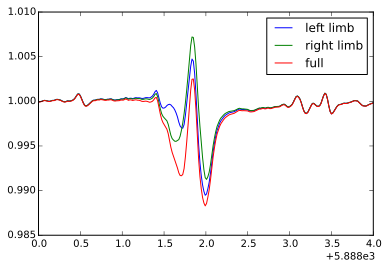

In [39]:
frame_no = 6

plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_left[frame_no][(wvl > 5888) & (wvl < 5892)],label='left limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_right[frame_no][(wvl > 5888) & (wvl < 5892)],label='right limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],full_model[frame_no][(wvl > 5888) & (wvl < 5892)],label='full')
plt.legend()
plt.show()

I think I'm going about this the wrong way... The effects are not going to look as good when combined with the RM effect. It's confusing.

#Without RM effect

The star vsini is normally 3.1 km/s, but we've turned it off here so we can remove the RM effect to see the absorption better

In [40]:
star_vsini = 0.0

In [41]:
full_model_noRM = old_m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini)

model_left_noRM = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='left')

model_right_noRM = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='right')

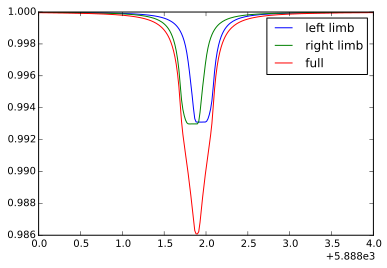

In [42]:
frame_no = 10

plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_left_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='left limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_right_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='right limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],full_model_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='full')
plt.legend()
plt.show()

In this plot the profiles are *not* normalised

#Without RM effect, extreme limbs

This time I only use the most extreme element on the left and right hand sides

In [43]:
star_vsini = 0.0

In [44]:
full_model_noRM_extreme = old_m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini)

model_left_noRM_extreme = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='leftest')

model_right_noRM_extreme = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='rightest')

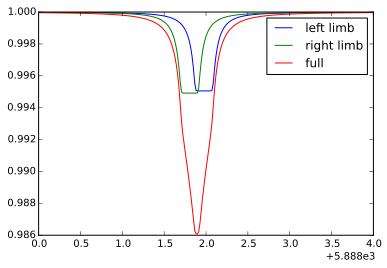

In [45]:
frame_no = 10

plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_left_noRM_extreme[frame_no][(wvl > 5888) & (wvl < 5892)],label='left limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_right_noRM_extreme[frame_no][(wvl > 5888) & (wvl < 5892)],label='right limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],full_model_noRM_extreme[frame_no][(wvl > 5888) & (wvl < 5892)],label='full')
plt.legend()
plt.show()

In this plot I've made an attempt to normalise by multiplying the small profiles by the total number of slices

#Comparing to the overall 

We're going to go with the version which uses the entire left/right limbs of the planet. This seems the most reasonable one to use, as it looks plausable and doesn't require too much fiddling.

In [46]:
star_vsini = 0.0

In [47]:
full_model_noRM = old_m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini)

model_left_noRM = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='left')

model_right_noRM = m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=star_vsini,location='right')

Now we have to make the total model fit, for comparison.

In [48]:
full_model = old_m3d.model_3d(x1,time,period,planet_K,star_K,midtransit,wvl,line_centers,plotting,nproc=nproc,best_fit=best_fit,save_star=save_star,star_vsini=3.1)

and sum it up...

In [49]:
combined_profile = np.mean(full_model,axis=0)

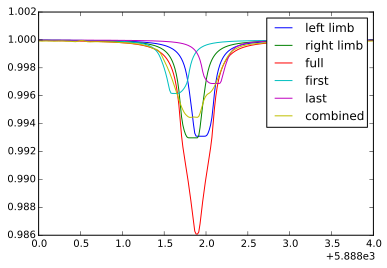

In [50]:
frame_no = 10

plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_left_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='left limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],model_right_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='right limb')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],full_model_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='full')

plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],full_model_noRM[1][(wvl > 5888) & (wvl < 5892)],label='first')
plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],full_model_noRM[18][(wvl > 5888) & (wvl < 5892)],label='last')

plt.plot(wvl[(wvl > 5888) & (wvl < 5892)],combined_profile[(wvl > 5888) & (wvl < 5892)],label='combined')

plt.legend()
plt.show()

A hideous mess, hooray! but all of the essential elements are there. We see how the profile changes in depth and position during the transit, and also how the profile splits by hemisphere. All this combines to mean you need a significantly larger planet radius than you would assume just by looking at the core of the line.

#Replotting in velocity space

change wvl to velocity co-ordinates - makes us visually distinct from the other paper and draws attention to the shifts in velocity

$\frac{\Delta\lambda}{\lambda} = \frac{v}{c}$

In [51]:
import astropy.constants as const

c = const.c.value/1000

star_vel = -2.3

delta_wvl = wvl
star_sodium1 = sodium_d[0]

star_sodium1 += star_vel*sodium_d[0]/c

delta_wvl = wvl - star_sodium1

v = c*delta_wvl/wvl

star_sodium2 = sodium_d[1]

star_sodium2 += star_vel*sodium_d[1]/c

delta_wvl2 = wvl - star_sodium2

v2 = c*delta_wvl2/wvl
master_dat = np.loadtxt('sodium_spectrum.dat')
master_wvl = master_dat[:,0]
master_flux = master_dat[:,1]

master_flux = master_flux/np.median(master_flux)

delta_wvlm = master_wvl - star_sodium1
vm = c*delta_wvlm/master_wvl

delta_wvlm2 = master_wvl - star_sodium2
vm2 = c*delta_wvlm2/master_wvl

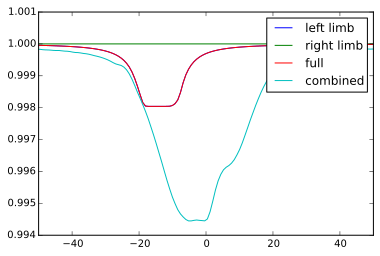

In [54]:
frame_no = 0

plt.plot(v[(wvl > 5888) & (wvl < 5892)],model_left_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='left limb')
plt.plot(v[(wvl > 5888) & (wvl < 5892)],model_right_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='right limb')
plt.plot(v[(wvl > 5888) & (wvl < 5892)],full_model_noRM[frame_no][(wvl > 5888) & (wvl < 5892)],label='full')

plt.plot(v[(wvl > 5888) & (wvl < 5892)],combined_profile[(wvl > 5888) & (wvl < 5892)],label='combined')

plt.xlim(-50,50)

plt.legend()
plt.show()

And plot the Stellar spectrum in the same regon for comparison

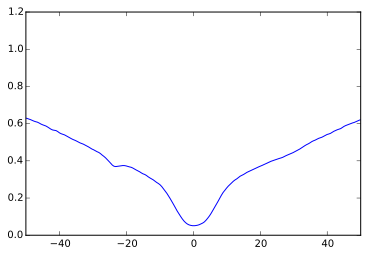

In [55]:
plt.plot(vm,master_flux)
plt.xlim(-50,50)
plt.show()

Looking good. I think it's time to do the three (6?) panel plot.

#Does adding the two sides work?

It would be useful to know if simply adding the relative transmission spectra from left and right sides is equivilent to modelling the full transit. Intuitively it seems like it should be, and by eye it looks like it might be... but it's worth just checking.

Let's take the mid-transit frame as an example.

In [56]:
added_both_sides = model_left_noRM[10] + model_right_noRM[10] - 1.0

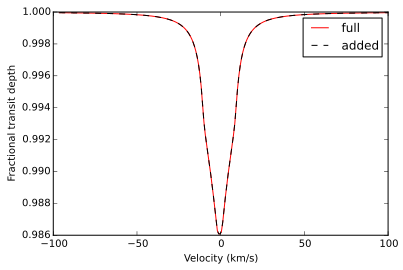

In [57]:
plt.plot(v[(wvl > 5888) & (wvl < 5892)],full_model_noRM[10][(wvl > 5888) & (wvl < 5892)],'r-',label='full')
plt.plot(v[(wvl > 5888) & (wvl < 5892)],added_both_sides[(wvl > 5888) & (wvl < 5892)],'k--',label='added')
plt.xlim(-100,100)

plt.xlabel('Velocity (km/s)')
plt.ylabel('Fractional transit depth')

plt.legend()

plt.show()

Yep, turns out they are indeed identical to just adding. Good to know

# Multi-panel plot

I think we need at least 4 panels - the star, then three model phases

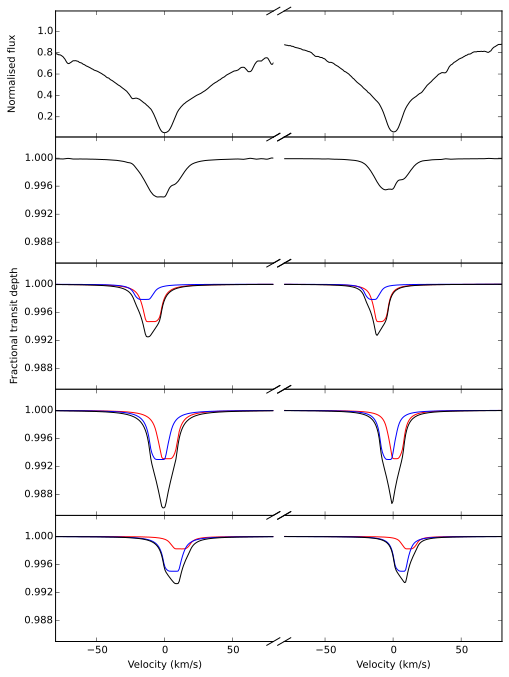

In [58]:
fig, ax = plt.subplots(5,2,sharex=True)
fig.set_size_inches(8, 11.3)

fig.subplots_adjust(hspace=0,wspace=0.05)

ax = ax.reshape(-1)

ax[0].plot(vm,master_flux,'k')
ax[1].plot(vm2,master_flux,'k')

left_side  = (wvl > 5888) & (wvl < 5892)
right_side  = (wvl > 5894) & (wvl < 5898)

ax[2].plot(v,combined_profile,'k',label='combined')
ax[3].plot(v2,combined_profile,'k',label='combined')

frames = [3,10,16]

for i in range(4,10):

    # sort out the LEFT hand side of the plots
    if i % 2 == 0:
        frame_no = frames[i/2-2]
        ax[i].plot(v[left_side],model_left_noRM[frame_no][left_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v[left_side],model_right_noRM[frame_no][left_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v[left_side],full_model_noRM[frame_no][left_side],'k',label='full')

    else:
        frame_no = frames[i/2-2]
        ax[i].plot(v2[right_side],model_left_noRM[frame_no][right_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v2[right_side],model_right_noRM[frame_no][right_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v2[right_side],full_model_noRM[frame_no][right_side],'k',label='full')

for i in range(0,2):
    ax[i].set_ylim(0.01,1.19)        
        
for i in range(2,10):
    ax[i].set_ylim(0.985,1.003)
    ax[i].set_yticks([0.988,0.992,0.996,1.000])
    
        
d = .03
for i in range(0,10):

    kwargs = dict(transform=ax[i].transAxes, color='k', clip_on=False)
    if i % 2 == 0:
        ax[i].spines['right'].set_visible(False)
        ax[i].tick_params(right='off')
        ax[i].plot((1-d,1+d),(-d,+d), **kwargs)
        ax[i].plot((1-d,1+d),(1-d,1+d), **kwargs)

        
    else:
        ax[i].spines['left'].set_visible(False)
        ax[i].tick_params(labelleft='off',left='off')
        ax[i].plot((-d,+d),(-d,+d), **kwargs)
        ax[i].plot((-d,+d),(1-d,1+d), **kwargs)

    ax[i].set_xlim(-80,80)
    ax[i].set_xticks([-50,0,50])
        
    
    
ax[8].set_xlabel('Velocity (km/s)')
ax[9].set_xlabel('Velocity (km/s)')

ax[4].set_ylabel('Fractional transit depth')

ax[0].set_ylabel('Normalised flux',labelpad=20)

plt.savefig('Model_multi_panel.pdf')
plt.show()

#Add data to combined plot?

This doesn't look quite right without having some data. The points should really be displayed on panel 2, at least.
the next three panels can stay clean to show how the profile changes. If people want to see data points on these they can see extended data figures

In [59]:
from plot_spectrum import bin_curve


In [60]:
scale = np.sqrt(3.0)
resamp_factor = 10

bin_wvl, bin_combined, bin_combined_error = bin_curve(wvl,np.median(spectra,axis=0),scale*np.std(spectra,axis=0)/np.sqrt(len(spectra)),resamp_factor)


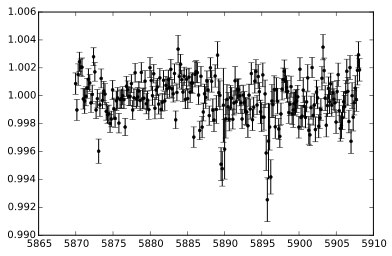

In [61]:
plt.errorbar(bin_wvl[5:-5],bin_combined[5:-5],yerr=bin_combined_error[5:-5],fmt='k.')
plt.show()

ok, there's your data... now make some usefull velocity space axis

In [62]:
star_sodium = sodium_d[0]
star_sodium += star_vel*sodium_d[0]/c
delta_wvl = bin_wvl - star_sodium

bin_v = c*delta_wvl/bin_wvl

star_sodium2 = sodium_d[1]
star_sodium2 += star_vel*sodium_d[1]/c
delta_wvl2 = bin_wvl - star_sodium2

bin_v2 = c*delta_wvl2/bin_wvl

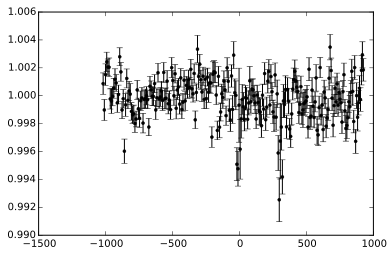

In [63]:
plt.errorbar(bin_v[5:-5],bin_combined[5:-5],yerr=bin_combined_error[5:-5],fmt='k.')
plt.show()

How does this look on top of everything else?

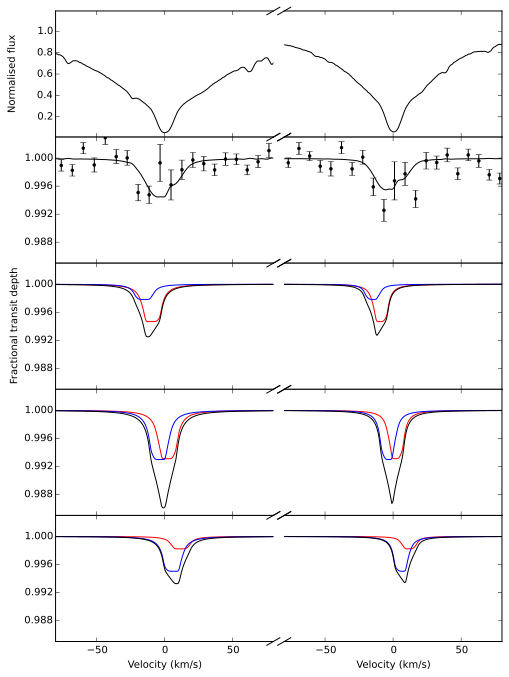

In [64]:
fig, ax = plt.subplots(5,2,sharex=True)
fig.set_size_inches(8, 11.3)

fig.subplots_adjust(hspace=0,wspace=0.05)

ax = ax.reshape(-1)

ax[0].plot(vm,master_flux,'k')
ax[1].plot(vm2,master_flux,'k')

left_side  = (wvl > 5888) & (wvl < 5892)
right_side  = (wvl > 5894) & (wvl < 5898)

ax[2].plot(v,combined_profile,'k',label='combined')
ax[2].errorbar(bin_v,bin_combined,yerr=bin_combined_error,fmt='k.')

ax[3].plot(v2,combined_profile,'k',label='combined')
ax[3].errorbar(bin_v2,bin_combined,yerr=bin_combined_error,fmt='k.')

frames = [3,10,16]

for i in range(4,10):

    # sort out the LEFT hand side of the plots
    if i % 2 == 0:
        frame_no = frames[i/2-2]
        ax[i].plot(v[left_side],model_left_noRM[frame_no][left_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v[left_side],model_right_noRM[frame_no][left_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v[left_side],full_model_noRM[frame_no][left_side],'k',label='full')

    else:
        frame_no = frames[i/2-2]
        ax[i].plot(v2[right_side],model_left_noRM[frame_no][right_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v2[right_side],model_right_noRM[frame_no][right_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v2[right_side],full_model_noRM[frame_no][right_side],'k',label='full')

for i in range(0,2):
    ax[i].set_ylim(0.01,1.19)        
        
for i in range(2,10):
    ax[i].set_ylim(0.985,1.003)
    ax[i].set_yticks([0.988,0.992,0.996,1.000])
    
        
d = .03
for i in range(0,10):

    kwargs = dict(transform=ax[i].transAxes, color='k', clip_on=False)
    if i % 2 == 0:
        ax[i].spines['right'].set_visible(False)
        ax[i].tick_params(right='off')
        ax[i].plot((1-d,1+d),(-d,+d), **kwargs)
        ax[i].plot((1-d,1+d),(1-d,1+d), **kwargs)

        
    else:
        ax[i].spines['left'].set_visible(False)
        ax[i].tick_params(labelleft='off',left='off')
        ax[i].plot((-d,+d),(-d,+d), **kwargs)
        ax[i].plot((-d,+d),(1-d,1+d), **kwargs)

    ax[i].set_xlim(-80,80)
    ax[i].set_xticks([-50,0,50])
        
    
    
ax[8].set_xlabel('Velocity (km/s)')
ax[9].set_xlabel('Velocity (km/s)')

ax[4].set_ylabel('Fractional transit depth')

ax[0].set_ylabel('Normalised flux',labelpad=20)

plt.savefig('Model_multi_panel_withdata.pdf')
plt.show()

That doesn't look so good. My first impression would be 'how is there enough power in those data points to recover those detailed looking profiles'. It looked better in the original draft of the paper because I was alligning on velocity, but doing that here defeats part of the point of the plot which was to show how the velocity broadening is present.

#Velocity alligned spectra

let's recover the velocity stacked profile for comparison

In [65]:
midtransit = 54341.056842
period =  2.21857312
planet_K = 154

vel_model = -1*1000*planet_K*np.sin(2.0*np.pi*(midtransit-time)/period)


In [66]:
from spec_manip import align_spectra

alligned = align_spectra(wvl,spectra.copy(),vel_model)

bin_wvl, bin_alligned, bin_alligned_error = bin_curve(wvl,np.median(alligned,axis=0),scale*np.std(alligned,axis=0)/np.sqrt(len(spectra)),resamp_factor)

alligned_model = align_spectra(wvl,full_model.copy(),vel_model)

alligned_profile = np.mean(alligned_model,axis=0)


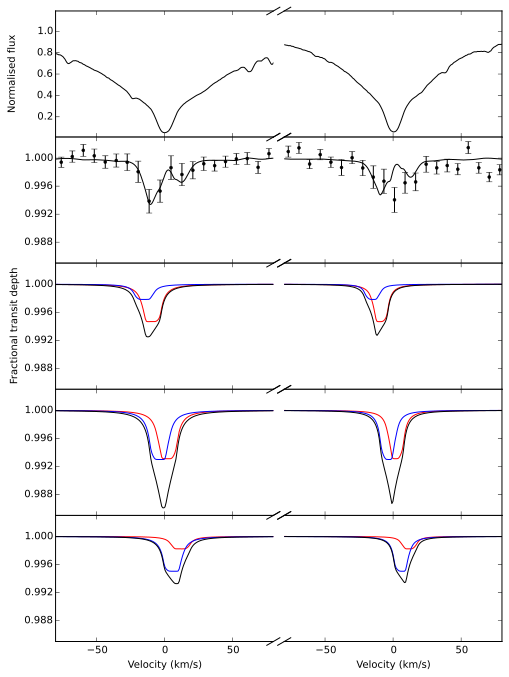

In [67]:
fig, ax = plt.subplots(5,2,sharex=True)
fig.set_size_inches(8, 11.3)

fig.subplots_adjust(hspace=0,wspace=0.05)

ax = ax.reshape(-1)

ax[0].plot(vm,master_flux,'k')
ax[1].plot(vm2,master_flux,'k')

left_side  = (wvl > 5888) & (wvl < 5892)
right_side  = (wvl > 5894) & (wvl < 5898)

ax[2].plot(v,alligned_profile,'k',label='combined')
ax[2].errorbar(bin_v,bin_alligned,yerr=bin_alligned_error,fmt='k.')

ax[3].plot(v2,alligned_profile,'k',label='combined')
ax[3].errorbar(bin_v2,bin_alligned,yerr=bin_alligned_error,fmt='k.')

frames = [3,10,16]

for i in range(4,10):

    # sort out the LEFT hand side of the plots
    if i % 2 == 0:
        frame_no = frames[i/2-2]
        ax[i].plot(v[left_side],model_left_noRM[frame_no][left_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v[left_side],model_right_noRM[frame_no][left_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v[left_side],full_model_noRM[frame_no][left_side],'k',label='full')

    else:
        frame_no = frames[i/2-2]
        ax[i].plot(v2[right_side],model_left_noRM[frame_no][right_side],ls='-',color=(1,0,0),label='left limb')
        ax[i].plot(v2[right_side],model_right_noRM[frame_no][right_side],ls='-',color=(0,0,1),label='right limb')
        ax[i].plot(v2[right_side],full_model_noRM[frame_no][right_side],'k',label='full')

for i in range(0,2):
    ax[i].set_ylim(0.01,1.19)        
        
for i in range(2,10):
    ax[i].set_ylim(0.985,1.003)
    ax[i].set_yticks([0.988,0.992,0.996,1.000])
    
        
d = .03
for i in range(0,10):

    kwargs = dict(transform=ax[i].transAxes, color='k', clip_on=False)
    if i % 2 == 0:
        ax[i].spines['right'].set_visible(False)
        ax[i].tick_params(right='off')
        ax[i].plot((1-d,1+d),(-d,+d), **kwargs)
        ax[i].plot((1-d,1+d),(1-d,1+d), **kwargs)

        
    else:
        ax[i].spines['left'].set_visible(False)
        ax[i].tick_params(labelleft='off',left='off')
        ax[i].plot((-d,+d),(-d,+d), **kwargs)
        ax[i].plot((-d,+d),(1-d,1+d), **kwargs)

    ax[i].set_xlim(-80,80)
    ax[i].set_xticks([-50,0,50])
        
    
    
ax[8].set_xlabel('Velocity (km/s)')
ax[9].set_xlabel('Velocity (km/s)')

ax[4].set_ylabel('Fractional transit depth')

ax[0].set_ylabel('Normalised flux',labelpad=20)

plt.savefig('Model_multi_panel_vel_alligned.pdf')
plt.show()

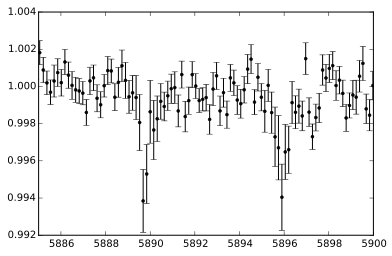

In [68]:
plt.errorbar(bin_wvl[5:-5],bin_alligned[5:-5],yerr=bin_alligned_error[5:-5],fmt='k.')
plt.xlim(5885,5900)
plt.show()

##New plots to make

Discussing improvements to the paper with Pete

* "Absolute flux" version of the 4 panel plot to highlight the impact of moving through the stellar line profile
* Literature review again - check exactly what it was the Geneva paper (and others) say about the depth of the line profile in relation to atmosphere planetary depth
* New "plot 1" possibly including the transit schematic. How does the illumination of the planet change as a function of time. Also split by hemisphere.